# Box Plots and Five Number Summaries Using Pandas

In the `pandas` library, it is easy to create box plots and five number summaries for each column of data. 

In this notebook, we will import some data from a CSV file into a pandas dataframe.

The data come from the **2024 American Community Survey**, which is a wide-ranging survey of US residents conducted by the Census Bureau. You can read more about it on the [Census Bureau Website](https://www.census.gov/programs-surveys/acs.html).

In [1]:
# Preliminaries - import required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Set display options and load data into a dataframe called acs
pd.set_option("display.precision", 2)
acs = pd.read_csv('/home/shared/ACS_2024.csv')

# We will use the following dictionaries to recode some of the data
st_dict = {1: 'Connecticut', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'Rhode Island', 6: 'Vermont', 
11: 'Delaware', 12: 'New Jersey', 13: 'New York', 14: 'Pennsylvania', 21: 'Illinois', 22: 'Indiana', 23: 'Michigan', 
24: 'Ohio', 25: 'Wisconsin', 31: 'Iowa', 32: 'Kansas', 33: 'Minnesota', 34: 'Missouri', 35: 'Nebraska', 36: 'North Dakota', 
37: 'South Dakota', 40: 'Virginia', 41: 'Alabama', 42: 'Arkansas', 43: 'Florida', 44: 'Georgia', 45: 'Louisiana', 
46: 'Mississippi', 47: 'North Carolina', 48: 'South Carolina', 49: 'Texas', 51: 'Kentucky', 52: 'Maryland', 53: 'Oklahoma', 
54: 'Tennessee', 56: 'West Virginia', 61: 'Arizona', 62: 'Colorado', 63: 'Idaho', 64: 'Montana', 65: 'Nevada', 66: 'New Mexico', 
67: 'Utah', 68: 'Wyoming', 71: 'California', 72: 'Oregon', 73: 'Washington', 81: 'Alaska', 82: 'Hawaii', 
83: 'Puerto Rico', 96: 'State groupings (1980 Urban/rural sample)', 97: 'Military/Mil. Reservations', 
98: 'District of Columbia', 99: 'State not identified'}

mf_dict = {1:"Male", 2:"Female", 9:"Missing/blank"}


In [2]:
# Recoding / cleaning
acs.drop(columns=['SAMPLE', 'SERIAL', 'CBSERIAL', 'CLUSTER', 'HHWT', 'GQ', 'PERNUM', 'PERWT'], inplace=True)
acs = acs[acs['INCTOT']<999998]
acs['State'] = acs['STATEICP'].replace(st_dict)
acs['Gender'] = acs['SEX'].replace(mf_dict)
acs.drop(columns=['STATEICP', 'SEX', 'YEAR'], inplace=True)
acs.rename(columns={'INCTOT':'Total Income', 'AGE':'Age'}, inplace=True)
new_cols = ['State', 'Gender', 'Age', 'Total Income']
acs = acs[new_cols]
acs

,State,Gender,Age,Total Income
0,Alabama,Male,59,18500
1,Alabama,Male,20,0
2,Alabama,Male,21,0
3,Alabama,Male,44,30600
4,Alabama,Female,82,21400
...,...,...,...,...
683750,Wyoming,Female,66,53400
683751,Wyoming,Female,36,43600
683752,Wyoming,Male,15,0
683754,Wyoming,Male,78,57300


Now that we have loaded and cleaned the data, we can start to analyze it. You will see there are 4 columns:

- State
- Gender
- Age
- Total Income

The first two columns are categorical data and the last two are numerical data.

We can use the `.describe()` method to get the five number summary for the numerical data.

In [3]:
acs.describe()

,Age,Total Income
count,581071.00,581071.00
mean,49.68,54234.62
std,20.23,77634.61
min,15.00,-11500.00
25%,33.00,10500.00
50%,50.00,34000.00
75%,66.00,70000.00
max,96.00,995000.00


We can use **boolean indexing** to describe subsets of the dataset. The format for this is

In the example below, we use `.describe()` on just those rows where the state is 'Maine'.

In [4]:
# Summary statistics for Maine residents only
acs[acs['State']=='Maine'].describe()

,Age,Total Income
count,2625.00,2625.00
mean,53.28,45350.87
std,20.41,58010.26
min,15.00,-8600.00
25%,37.00,12000.00
50%,57.00,32000.00
75%,70.00,59000.00
max,95.00,686000.00


In [5]:
# Summary statistics for Utah residents only
acs[acs['State']=='Utah'].describe()

,Age,Total Income
count,5867.00,5867.00
mean,44.03,52477.03
std,19.82,72133.69
min,15.00,-9800.00
25%,27.00,9000.00
50%,42.00,34300.00
75%,60.00,70000.00
max,92.00,987000.00


## Using Box Plots

It looks like Maine residents are older than Utah residents on average. Let's compare the distribution of ages using box plots.

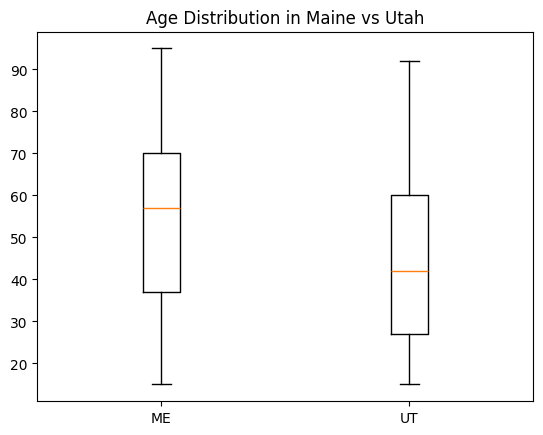

In [6]:
# Create a box plot comparing ages of Maine residents with Utah residents, based on sample.
ME = acs[acs['State']=='Maine']
UT = acs[acs['State']=='Utah']
plt.boxplot([ME['Age'], UT['Age']])
plt.title('Age Distribution in Maine vs Utah')
plt.xticks([1, 2], ['ME', 'UT'])
plt.show()

# Exercise 1

Create a subset of the dataframe for just Colorado using `CO = acs[acs['State']=='Colorado']`.

Use the `.describe()` method to see the summary statistics for Colorado.

Create a box plot to visualize the distribution of ages of Colorado residents. 

Create side-by-side box plots to compare ages of ME, UT and CO.

In [7]:
CO = acs[acs['State']=='Colorado']
CO.describe()

,Age,Total Income
count,10749.00,10749.00
mean,48.27,65285.83
std,19.92,90590.87
min,15.00,-8200.00
25%,32.00,12500.00
50%,47.00,40190.00
75%,65.00,83000.00
max,93.00,849000.00


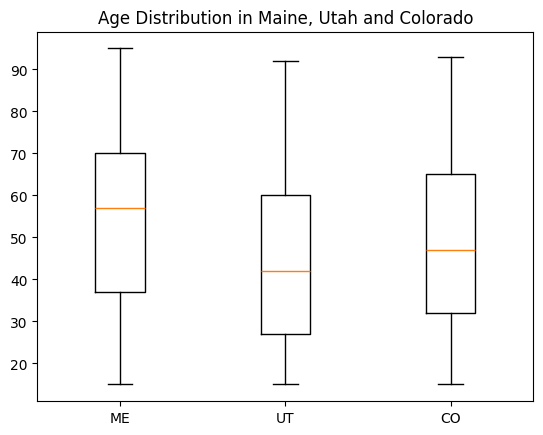

In [8]:
plt.boxplot([ME['Age'], UT['Age'], CO['Age']])
plt.title('Age Distribution in Maine, Utah and Colorado')
plt.xticks([1, 2, 3], ['ME', 'UT', 'CO'])
plt.show()

## Comparing Incomes

These data give incomes for all individuals in the survey (15 or older), whether they are at school, working or retired.

Let's look at the income distribution for Colorado.

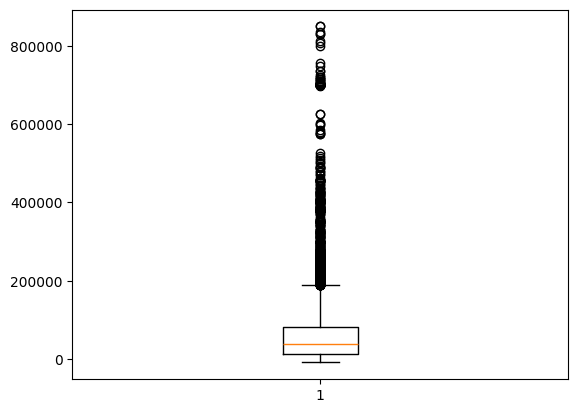

In [9]:
plt.boxplot(CO['Total Income'])
plt.show()

## Hiding Outliers

You'll notice there are a lot of outliers at the high end of the income scale. This is typical with income graphs. We can hide the outliers using the `showfliers=False` options.

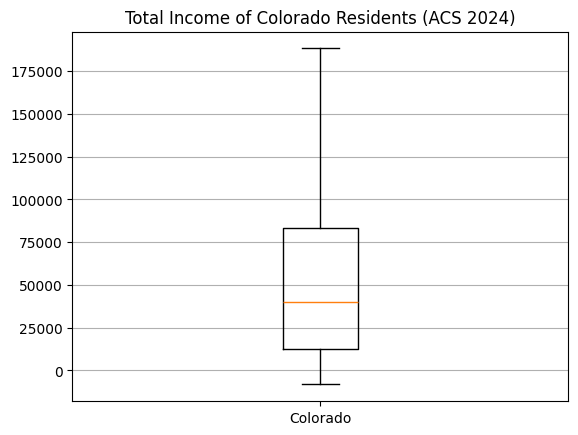

In [10]:
plt.boxplot(CO['Total Income'], showfliers=False)
plt.xticks([1], ['Colorado'])
plt.title('Total Income of Colorado Residents (ACS 2024)')
plt.grid(axis='y')
plt.show()

## Exercise 2

Create side-by-side box plots comparing incomes of Colorado, California and Mississippi. Use `showfliers=False` initially to see the plots without outliers. Then do another plot with outliers included to compare.

Start by creating dataframe subsets just for California and Mississippi, called `CA` and `MS` respectively.

Once you've done this, answer the questions that follow.

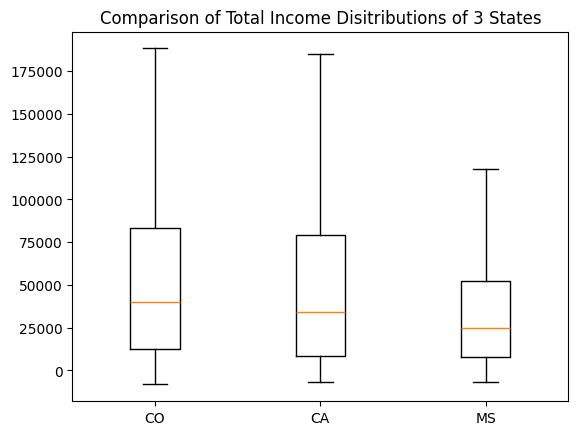

In [11]:
CA = acs[acs['State']=='California']
MS = acs[acs['State']=='Mississippi']
plt.boxplot([CO['Total Income'], CA['Total Income'], MS['Total Income']], showfliers=False)
plt.title("Comparison of Total Income Disitributions of 3 States")
plt.xticks([1,2, 3], ['CO', 'CA', 'MS'])
plt.show()

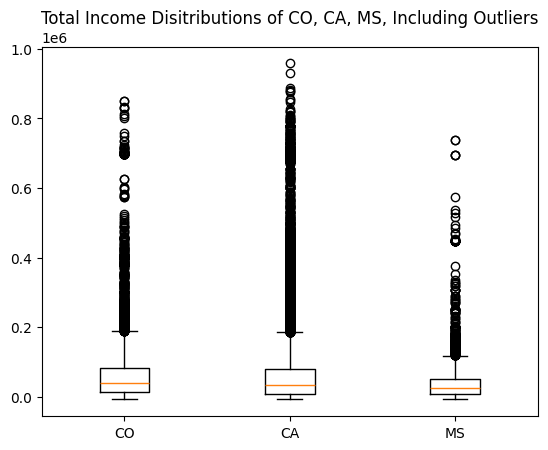

In [17]:
plt.boxplot([CO['Total Income'], CA['Total Income'], MS['Total Income']])
plt.title("Total Income Disitributions of CO, CA, MS, Including Outliers")
plt.xticks([1,2, 3], ['CO', 'CA', 'MS'])
plt.show()

## Some questions

1. Which state of the 3 has the highest median total income?
2. Which state has the lowest median total income?
3. Based on these data, which state has the person with the highest total income?
4. Is is fair to say that the poorest 25% of residents in California (based on total income) earn less than the poorest 25% in Colorado?

Answer 1: Colorado has the highest median total income based on these data.

Answer 2: Mississippi has the lowest median total income.

Answer 3: California has the highest individual income. However, as this is an outlier, it is only shown on the box plot that includes outliers.

Answer 4: Yes, the lower quartile for CA is lower than that for CO. While it is possible that the average total income for the poorest 25% is higher in CA than CO, it is most likely that it is lower in CA, based on the lower quartile.

## Exercise 3

Suppose we wanted to compare incomes males and females, but only for working age individuals, so excluding those 65 or older. Write the code to do this. Your code should result in side-by-side box plots showing the total income distribution for males and females.

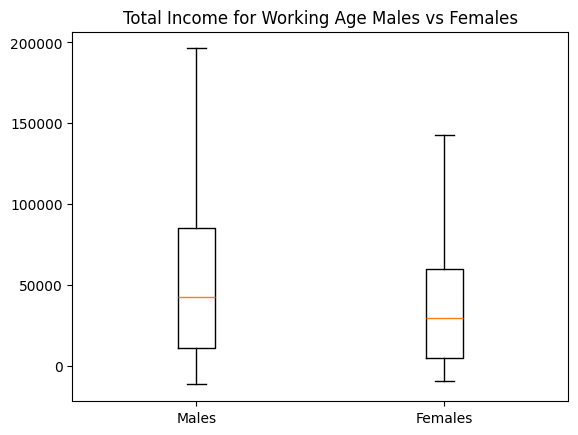

In [13]:
# First create working age subset
wa = acs[acs['Age']<65]

# Now create subsets for working age males and females
wa_m = wa[wa['Gender']=='Male']
wa_f = wa[wa['Gender']=='Female']

plt.boxplot([wa_m['Total Income'], wa_f['Total Income']], showfliers=False)
plt.xticks([1, 2], ['Males', 'Females'])
plt.title("Total Income for Working Age Males vs Females")
plt.show()